In [0]:
import numpy as np

In [0]:
import progressbar

In [0]:
import pandas as pd
from pandas import DataFrame

In [0]:
import sklearn as sk
import sklearn.datasets as db
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score 

In [0]:
import scikitplot as skplt

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [0]:
from easyesn import ClassificationESN
from easyesn import OneHotEncoder
from easyesn.optimizers import GridSearchOptimizer

Using Numpy backend.


In [0]:
import xgboost

In [0]:
np.random.seed(4)

In [0]:
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cor=0
        for i in range(len(cm)):
            cor+=cm[i,i]
        print("Normalized confusion matrix ",cor)
    else:
        cor=0
        for i in range(len(cm)):
            cor+=cm[i,i]
        print('Confusion matrix, without normalization ',cor)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
import os
folderName = "C:/Users/i5/Google Диск/ПМИ/курсы/курсовая работа/project proposal/main+pics/TheReservoirComputingBasicModelandSoftwareImplementationoftheNeuralNetworkESN/pics"

## I. ИССЛЕДОВАНИЕ АРХИТЕКТУРЫ ESN

<b>Генерирование набора данных ( т.е. двух экспериментально выбранных сигналов: $\hspace{0.3cm}f(t)=-3^{t}\hspace{0.3cm}$ и $ \hspace{0.3cm}f(t)=2^{t} $  )

In [0]:
n_data = 2                                  
n_features = 15                             
t=np.linspace(-10,10,n_features)
inputData = np.empty((n_data, n_features))
inputData[0,:]=np.array(-3**t)
inputData[1,:]=np.array(2**t)
outputData=np.array(([0,1],[1,0]))

In [0]:
showData=DataFrame(np.hstack((inputData,np.array([outputData[:,0]]).T)))
names=[]
for i in range(n_features):
    names.append('feature'+str(i+1))
names.append("class")
showData.columns=names
showData.rename(index={0:'Signal1',1:'signal2'}, inplace=True)
showData.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,class
Signal1,-0.000017,-0.000081,-0.000391,-0.001878,-0.009020,-0.043331,-0.208160,-1.0,-4.803987,-23.078288,-110.867787,-532.607368,-2558.638688,-12291.666114,-59049.0,0.0
signal2,0.000977,0.002629,0.007076,0.019047,0.051271,0.138011,0.371499,1.0,2.691800,7.245789,19.504218,52.501463,141.323458,380.414538,1024.0,1.0


<b> Создание объекта эхо-сети с резервуаром, состоящем из трех нейронов. Соответственно, в предложенном случае эхо-сеть является трехмерной динамической системой.

 Используем  __ClassificationESN__ из библиотеки __[easyesn](https://github.com/kalekiu/easyesn)__ для задачи бинарной классификации 

In [0]:
classESN= ClassificationESN(1,3, 2) #n_input=1, n_reservoir=3, n_classes=2

<b> Связи нейронов в резервуаре( матрица _W)  при leakingRate=1.0

In [0]:
print('The random reservoir of the ESN object \n')
print(classESN._W)

The random reservoir of the ESN object 

[[ 0.          0.          0.        ]
 [-0.41491646 -1.          0.        ]
 [ 0.          0.          0.        ]]


### Обучение объекта ESN 

In [0]:
training_error=classESN.fit(inputData, outputData, verbose=1)
print('training_error',training_error)

100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


training_error 0.650184918235


#### Вектор реакции объекта ESN на сигнал inputData

In [0]:
print(classESN._X.shape)

(5, 30)


####  W_out - матрица считыватель( readout), которая формируется во время обучения объекта сети. Также W_out позволяет постороить плоскоть в трехмерном пространстве, с помощью которой, можно будет классифицировать сигналы.

In [0]:
print(classESN._W_out.shape)

(2, 5)


#### Нормали разделющих плоскостей

In [0]:
normal1=np.array(([0,0,0],[classESN._W_out[0,2],classESN._W_out[0,3],classESN._W_out[0,4]])) #нормаль к первой плоскости     
normal1=normal1/np.sqrt(normal1[1,0]**2+normal1[1,1]**2+normal1[1,2]**2)
normal1=normal1.T
print("The first normal\n", normal1)

normal2=np.array(([0,0,0],[classESN._W_out[1,2],classESN._W_out[1,3],classESN._W_out[1,4]])) #нормаль к второй плоскоти 
normal2=normal2/np.sqrt(normal2[1,0]**2+normal2[1,1]**2+normal2[1,2]**2)
normal2=normal2.T
print("The second normal\n", normal2)

The first normal
 [[ 0.         -0.14684202]
 [ 0.          0.59903528]
 [ 0.         -0.78714304]]
The second normal
 [[ 0.          0.14684202]
 [ 0.         -0.59903528]
 [ 0.          0.78714304]]


<IPython.core.display.Javascript object>


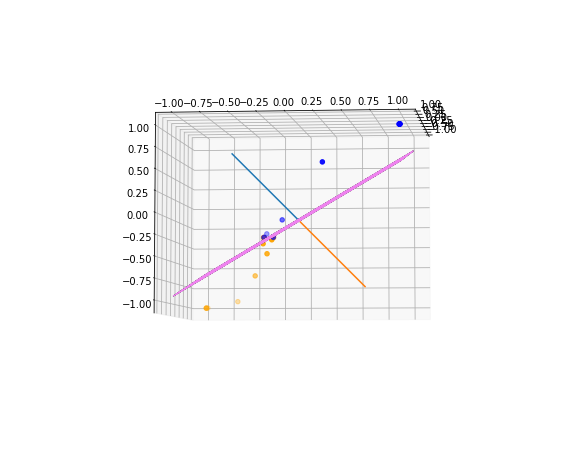

In [0]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(n_data):
    if(outputData[i,0]==0):
        ax.scatter3D(classESN._X[2][(i*n_features):((i+1)*n_features)], classESN._X[3][(i*n_features):((i+1)*n_features)], classESN._X[4][(i*n_features):((i+1)*n_features)],color="blue")
    else:
        ax.scatter3D(classESN._X[2][i*n_features:(i+1)*n_features], classESN._X[3][i*n_features:(i+1)*n_features], classESN._X[4][i*n_features:(i+1)*n_features],color="orange")
xx, yy = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
zz1=(-classESN._W_out[0,2]*xx - classESN._W_out[0,3]*yy)/classESN._W_out[0,4] 
zz2=(-classESN._W_out[1,2]*xx - classESN._W_out[1,3]*yy)/classESN._W_out[1,4] 
ax.plot_surface(xx,yy,zz1,color='none',edgecolors='black' ) 
ax.plot_surface(xx,yy,zz2,color='none',edgecolors='violet' ) 
ax.plot(normal2[:][0],normal2[:][1],normal2[:][2])
ax.plot(normal1[:][0],normal1[:][1],normal1[:][2]) 
plt.show()


## II. ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ БИНАРНОГО КЛАССИФИКАТОРА НА ESN  ОТ СПОСОБА ТЕМПОРАЛИЗАЦИИ ДАННЫХ


Генерирование синтезированного набора данных, используя __sklearn.datasets.make_classification()__

In [0]:
n_features=12
n_samples=4000
n_train=round(0.6*n_samples)
n_classes=2
inputData,output=db.make_classification(n_samples=n_samples, n_features=n_features, n_informative=8, n_repeated=2,
                                            n_classes=n_classes, n_clusters_per_class=2)

In [0]:
ohe=OneHotEncoder()
outputData=ohe.fit_transform(output)

In [0]:
showData=DataFrame(inputData)
names=[]
for i in range(n_features):
    names.append('f'+str(i+1))
showData.columns=names
for i in range(5):
    if(outputData[i,0]==0):
        showData.rename(index={i:'class1'}, inplace=True)
    else:
        showData.rename(index={i:'class2'}, inplace=True)
showData.columns=names
showData.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
class2,-2.053054,2.443958,-1.968354,1.165341,0.429704,-2.553694,2.443958,0.483940,0.483940,0.780988,0.811702,-2.080944
class1,-0.319072,2.452804,-3.405372,-1.746882,4.166910,-1.960424,2.452804,1.155086,1.155086,-1.386469,2.867087,-6.857929
class2,-0.555843,-2.964772,-0.433404,-0.937084,-1.951417,2.840781,-2.964772,-1.145518,-1.145518,-0.464212,0.765400,3.007804
class2,-1.320989,-1.388847,0.954399,-2.160274,1.533514,-3.012560,-1.388847,1.596963,1.596963,-1.706068,2.370854,2.478543
class2,1.039448,0.602613,-3.678243,-2.446364,0.185505,4.242406,0.602613,1.291237,1.291237,-1.602513,0.536568,-4.261864


0    1192
1    1208
dtype: int64


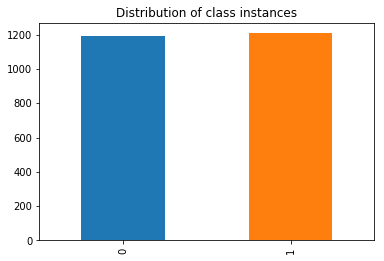

In [0]:
%matplotlib inline
frame=DataFrame(outputData[:n_train])
print(frame[lambda x: x==1].count())
frame[lambda x: x==1].count().plot.bar()
plt.title("Distribution of class instances")
plt.savefig(os.path.join(folderName, 'distribution.png'), format='png', dpi=200)
plt.show()

In [0]:
label=np.array(range(n_classes))
h=OneHotEncoder()
label=h.fit_transform(label)

<b> Проведем классификацию на полученных данных с помощью решающих деревьев

используем __xgboost.XGBClassifier() __

In [0]:
model = xgboost.XGBClassifier()
model.fit(inputData[:n_train],output[:n_train])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
predicted_xgb = model.predict(inputData[n_train:])

In [0]:
cnf_xgb=confusion_matrix(output[n_train:],predicted_xgb)#confusion matrix
acc_xg_synth=accuracy_score(output[n_train:],predicted_xgb)#accurasy score
print(acc_xg_synth)

0.93125


Confusion matrix, without normalization  1490


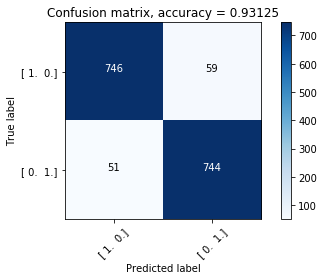

In [0]:
plt.figure()
plot_confusion_matrix(cnf_xgb, classes=label,title='Confusion matrix, accuracy = '+str(acc_xg_synth))
plt.savefig(os.path.join(folderName, 'xgcnfSynth.png'), dpi=200)
plt.show()

#### Исследуем важность признаков с помощь xgboost.plot_importance

В качестве критерия важности используем __weight__ т.е. кол-во раз, когда признак используется для разделения ветвей дерева 


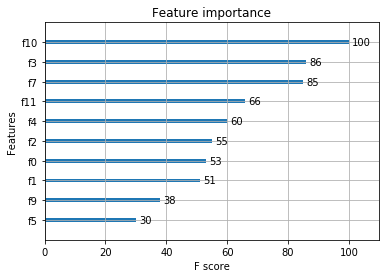

In [0]:
model.importance_type="weight"
xgboost.plot_importance(model,importance_type='weight',max_num_features=14)
plt.savefig('importance.png', format='png', dpi=200)
plt.show()

<b>Получим список признаков, отсортированный по важности ( importance_type=weight)<b/>

In [0]:
featlist=model.feature_importances_.argsort()
print(featlist)

[ 6  8  5  9  1  0  2  4 11  7  3 10]


### Модель бинарного классификатора на ESN

Создадим объект __ClassificationESN__ с резервуаром размерности 300

In [0]:
cls=ClassificationESN(1,300, n_classes)

In [0]:
cls.fit(inputData[:n_train],outputData[:n_train])

0.8079875034312648

In [0]:
predicted_esn=cls.predict(inputData[n_train:])

In [0]:
confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

array([[678, 127],
       [ 88, 707]], dtype=int64)

In [0]:
accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

0.86562499999999998

С помощью __GridSearchOptimizer__ получим наиболее подходящие настройки параметров для объекта ClassificationESN

In [0]:
_parametersDictionary={'leakingRate':np.linspace(0.1,0.9,25),
                       #'reservoirDensity':np.linspace(0.5,1,2)
                      }
_fixedParametersDictionary={'n_input':1, 'n_reservoir':300, 'n_classes':2}

In [0]:
opt=GridSearchOptimizer(type(cls), parametersDictionary=_parametersDictionary,
                        fixedParametersDictionary=_fixedParametersDictionary)

In [0]:
opt.fit(inputData[:n_train],outputData[:n_train],inputData[n_train:],outputData[n_train:],transientTime=0)

100% (25 of 25) |#########| Elapsed Time: 0:03:17 Time:  0:03:17 Loss:	1.31E-01


[(0.1525, 0.7623331298940336, {'leakingRate': 0.1}),
 (0.1525, 0.8031532565232986, {'leakingRate': 0.13333333333333333}),
 (0.151875, 0.8030579329957289, {'leakingRate': 0.16666666666666669}),
 (0.14875, 0.7992653149822178, {'leakingRate': 0.2}),
 (0.149375, 0.8334184481898819, {'leakingRate': 0.23333333333333334}),
 (0.14125, 0.7492687638293403, {'leakingRate': 0.26666666666666666}),
 (0.1475, 0.7167735905645071, {'leakingRate': 0.30000000000000004}),
 (0.141875, 0.750896454316533, {'leakingRate': 0.33333333333333337}),
 (0.144375, 0.8115109623979632, {'leakingRate': 0.3666666666666667}),
 (0.146875, 0.7716737091577897, {'leakingRate': 0.4}),
 (0.156875, 0.7850183651734556, {'leakingRate': 0.43333333333333335}),
 (0.136875, 0.7595516296003239, {'leakingRate': 0.4666666666666667}),
 (0.1575, 0.7290308318277072, {'leakingRate': 0.5}),
 (0.14375, 0.7542390589003515, {'leakingRate': 0.5333333333333333}),
 (0.1475, 0.7802336363963637, {'leakingRate': 0.5666666666666667}),
 (0.14, 0.7557876

In [0]:
best_arg=opt._best_params
best_arg

{'leakingRate': 0.6666666666666666}

<b>optimized leaking rate = 0.6666666666666666

In [0]:
optimized_Cls=ClassificationESN(1,300, n_classes,#inputDensity= opt._best_params['inputDensity'],
                leakingRate=0.6666666666666666,
                #reservoirDensity=best_arg['reservoirDensity'],
                        )

In [0]:
optimized_Cls.fit(inputData[:n_train],outputData[:n_train])

0.86795325080312757

In [0]:
cls=optimized_Cls

In [0]:
predicted_esn=cls.predict(inputData[n_train:])

In [0]:
cnf_matrix=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))
acc_synth=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

Confusion matrix, without normalization  1433


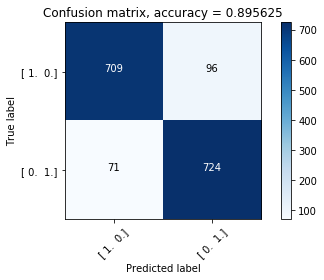

In [0]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label,title='Confusion matrix, accuracy = '+str(acc_synth))
plt.savefig(os.path.join(folderName, 'cnfSynth.png'), format='png', dpi=200)
plt.show()

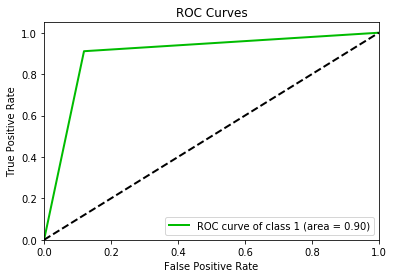

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),predicted_esn,
                       classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'notempoSynth.png'), format='png', dpi=200)
plt.show()

<b> Использую метод темпорализации, в котором последовательность признаков является временной последовотельностью, т.е. значение каждого признака интерпретируется как отсчет в некоторый момент времени. При изменении порядка признаков в наборе данных (столбцы в InputData), опираясь на важность признаков, будет изменяться временной ряд.

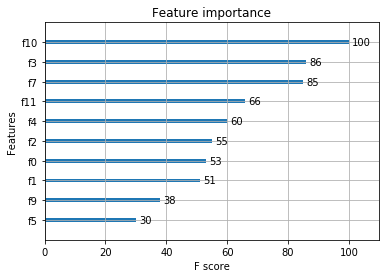

In [0]:
xgboost.plot_importance(model)

In [0]:
featlist

array([ 6,  8,  5,  9,  1,  0,  2,  4, 11,  7,  3, 10], dtype=int64)

<b> Меняем первые два признака по importance

In [0]:
changed1st2d=inputData.copy()
changed1st2d[:,featlist[-1]],changed1st2d[:,featlist[-2]]=changed1st2d[:,featlist[-2]],changed1st2d[:,featlist[-1]].copy()

In [0]:
cls.fit(changed1st2d[:n_train],outputData[:n_train])

0.91100212982991413

In [0]:
pred_1st2d=cls.predict(changed1st2d[n_train:])
cnf_1st2d=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
cnf_1st2d

array([[666, 139],
       [121, 674]], dtype=int64)

In [0]:
acc_1st2nd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(acc_1st2nd)

0.8375


Confusion matrix, without normalization  1340


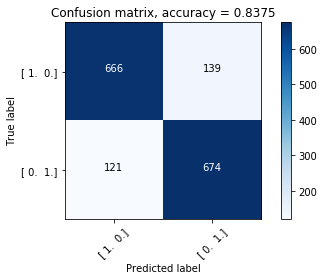

In [0]:
plt.figure()
plot_confusion_matrix(cnf_1st2d, classes=label,title='Confusion matrix, accuracy = '+str(acc_1st2nd))
plt.savefig(os.path.join(folderName, '1st2ndcnfSynth.png'), format='png', dpi=200)
plt.show()

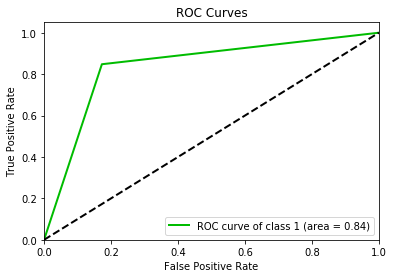

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1st2d,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, '1st2ndSynth.png'), format='png', dpi=200)
plt.show() 

####  Меняем первый признак с последним по importance 

In [0]:
changed1stEnd=inputData.copy()
changed1stEnd[:,featlist[0]],changed1stEnd[:,featlist[-1]]=changed1stEnd[:,featlist[-1]],changed1stEnd[:,featlist[0]].copy()

In [0]:
cls.fit(changed1stEnd[:n_train],outputData[:n_train])

0.64378617523194637

In [0]:
pred_1stEnd=cls.predict(changed1stEnd[n_train:])
cnf_1stEnd=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
cnf_1stEnd

array([[627, 146],
       [178, 649]], dtype=int64)

In [0]:
acc_1stEnd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
print(acc_1stEnd)

0.7975


Confusion matrix, without normalization  1276


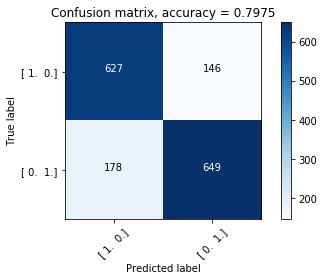

In [0]:
plt.figure()
plot_confusion_matrix(cnf_1stEnd, classes=label,title='Confusion matrix, accuracy = '+str(acc_1stEnd))
plt.savefig(os.path.join(folderName, '1stEndcnfSynth.png'), format='png', dpi=200)
plt.show()

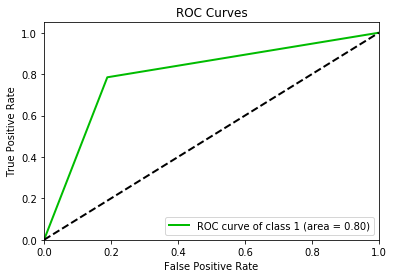

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1stEnd,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, '1stEndSynth.png'), format='png', dpi=200)
plt.show() 

#### По порядку importance

In [0]:
copy=inputData.copy()
ordered=inputData.copy()
for i in range(inputData.shape[1]):
    ordered[:,i]=copy[:,featlist[i]]

In [0]:
cls.fit(ordered[:n_train],outputData[:n_train])

0.64106671473334642

In [0]:
pred_ord=cls.predict(ordered[n_train:])
cnf_ord=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
cnf_ord

array([[630, 143],
       [216, 611]], dtype=int64)

In [0]:
acc_ord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(acc_ord)

0.775625


Confusion matrix, without normalization  1241


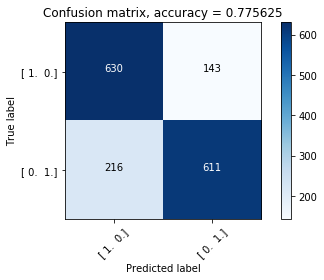

In [0]:
plt.figure()
plot_confusion_matrix(cnf_ord, classes=label,title='Confusion matrix, accuracy = '+str(acc_ord))
plt.savefig(os.path.join(folderName, 'ordcnfSynth.png'), format='png', dpi=200)
plt.show()

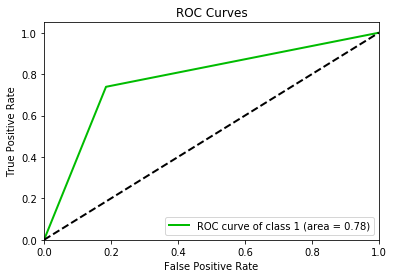

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_ord,classes_to_plot=[1],plot_micro=False,plot_macro=False)
plt.savefig(os.path.join(folderName, 'ordSynth.png'), format='png', dpi=200)
plt.show() 

#### В обратном порядке importance

In [0]:
copy=inputData.copy()
reverse=inputData.copy()
for i in range(inputData.shape[1]):
    reverse[:,i]=copy[:,featlist[inputData.shape[1]-i-1]]

In [0]:
cls.fit(reverse[:n_train],outputData[:n_train])

0.64747536799820493

In [0]:
pred_rev=cls.predict(reverse[n_train:])
cnf_rev=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
cnf_rev

array([[621, 152],
       [186, 641]], dtype=int64)

In [0]:
acc_nonord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(acc_nonord)

0.78875


Confusion matrix, without normalization  1262


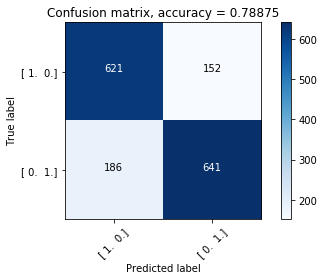

In [0]:
plt.figure()
plot_confusion_matrix(cnf_rev, classes=label,title='Confusion matrix, accuracy = '+str(acc_nonord))
plt.savefig(os.path.join(folderName, 'nonordcnfSynth.png'), format='png', dpi=200)
plt.show()

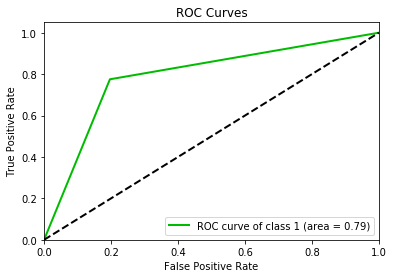

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_rev,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'nonordSynth.png'), format='png', dpi=200)
plt.show() 

#### Перемешиваем все столбцы  

In [0]:
shuffled=inputData.copy()
shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]

In [0]:
cls.fit(shuffled[:n_train],outputData[:n_train])

0.68821331748975811

In [0]:
pred_shuffl=cls.predict(shuffled[n_train:])
cnf_shuffl=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
cnf_shuffl

array([[694, 111],
       [101, 694]], dtype=int64)

In [0]:
acc_shuff=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
print(acc_shuff)

0.8675


Confusion matrix, without normalization  1388


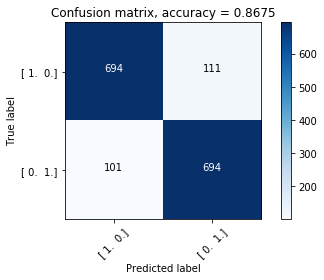

In [0]:
plt.figure()
plot_confusion_matrix(cnf_shuffl, classes=label,title='Confusion matrix, accuracy = '+str(acc_shuff))
plt.savefig(os.path.join(folderName, 'shuffcnfSynth.png'), format='png', dpi=200)
plt.show()

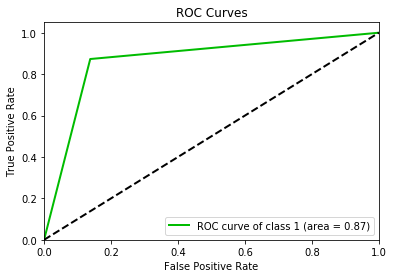

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_shuffl,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.show() 

## III [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) dataset from Kaggle.com

### Heart Disease UCI
feature list:
- age:  in years <br/>
- sex: (1 = male; 0 = female) <br/>
- cp: chest pain type<br/>
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br/>
- chol: serum cholestoral in mg/dl<br/>
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br/>
- restecg: resting electrocardiographic results<br/>
- thalach: maximum heart rate achieved<br/>
- exang: exercise induced angina (1 = yes; 0 = no)<br/>
- oldpeak: ST depression induced by exercise relative to rest<br/>
- slope: the slope of the peak exercise ST segment<br/>
- ca: number of major vessels (0-3) colored by flourosopy<br/>
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br/>
- target: 1 or 0<br/>

In [0]:
file = 'heart.csv'
# Load spreadsheet
data=DataFrame(pd.read_csv(file) )
data=data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


<b> бинарный классификатор на xgboost

In [0]:
_input=DataFrame(data.loc[:,data.columns[:-1]],columns=data.columns)
_output=data.loc[:,data.columns[-1]]

In [0]:
ohe=OneHotEncoder()
inputData=np.array(data.loc[:,data.columns[:-1]])
outputData=ohe.fit_transform(np.array(_output))

In [0]:
n_train=round(0.65*inputData.shape[0])

In [0]:
model = xgboost.XGBClassifier()
model.fit(_input[:n_train],_output[:n_train])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

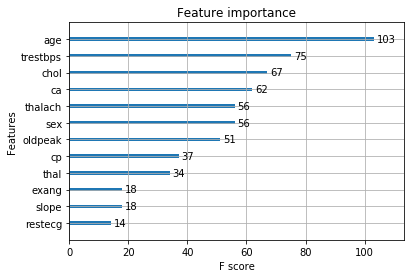

In [0]:
xgboost.plot_importance(model)

In [0]:
model.importance_type="weight"
featlist=model.feature_importances_.argsort()
featlist=featlist[1:]
featlist

array([13,  6,  8, 10, 12,  2,  9,  1,  7, 11,  4,  3,  0], dtype=int64)

In [0]:
pred_xgb = model.predict(_input[n_train:])

In [0]:
acc_xg_real=accuracy_score(pred_xgb,_output[n_train:])

Confusion matrix, without normalization  82


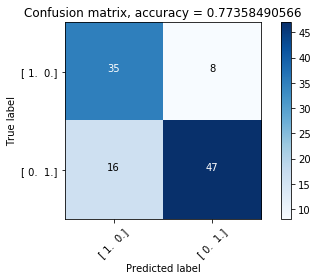

In [0]:
cnf_real=confusion_matrix(_output[n_train:],pred_xgb)
plt.figure()
plot_confusion_matrix(cnf_real, classes=label,title='Confusion matrix, accuracy = '+str(acc_xg_real))
plt.savefig(os.path.join(folderName, 'xgcnfReal.png'), format='png', dpi=200)
plt.show()

<b>бинарный классификатор на ESN

In [0]:
cls=ClassificationESN(1,300, 2,#inputDensity= opt._best_params['inputDensity'],
               # leakingRate= best_arg['leakingRate'],
               # reservoirDensity= best_arg['reservoirDensity'],
                        )

In [0]:
cls.fit(inputData[:n_train],outputData[:n_train])

0.79869231034583377

In [0]:
pred_esn=cls.predict(inputData[n_train:])
cnf_real=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))

In [0]:
acc_real=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))
print(acc_real)

0.745283018868


In [0]:
_parametersDictionary={'leakingRate':np.linspace(0.2,0.9,25),
                       #'reservoirDensity':np.linspace(0.1,1,10)
                      }
_fixedParametersDictionary={'n_input':1, 'n_reservoir':300, 'n_classes':2}

In [0]:
opt=GridSearchOptimizer(ClassificationESN, parametersDictionary=_parametersDictionary,
                        fixedParametersDictionary=_fixedParametersDictionary)

In [0]:
opt.fit(inputData[:n_train],outputData[:n_train],inputData[n_train:],outputData[n_train:])

100% (25 of 25) |#########| Elapsed Time: 0:00:28 Time:  0:00:28 Loss:	1.70E-01


[(0.24528301886792453,
  0.84239261475833249,
  {'leakingRate': 0.20000000000000001}),
 (0.25471698113207547,
  0.84190402539206843,
  {'leakingRate': 0.22916666666666669}),
 (0.23584905660377359,
  0.83291770491817518,
  {'leakingRate': 0.25833333333333336}),
 (0.24528301886792453,
  0.85576782578828114,
  {'leakingRate': 0.28749999999999998}),
 (0.19811320754716982,
  0.82251284480365772,
  {'leakingRate': 0.31666666666666665}),
 (0.21698113207547171,
  0.83153200772868185,
  {'leakingRate': 0.34583333333333333}),
 (0.23584905660377359, 0.84444778463366066, {'leakingRate': 0.375}),
 (0.23584905660377359,
  0.8250536080942783,
  {'leakingRate': 0.40416666666666667}),
 (0.22641509433962265,
  0.82310065372457497,
  {'leakingRate': 0.43333333333333335}),
 (0.25471698113207547,
  0.88957578785014424,
  {'leakingRate': 0.46249999999999997}),
 (0.20754716981132076,
  0.84288886522559336,
  {'leakingRate': 0.49166666666666664}),
 (0.22641509433962265,
  0.82116920766735502,
  {'leakingRate'

In [0]:
best_arg=opt._best_params
best_arg

{'leakingRate': 0.6958333333333333}

<b>optimized leaking rate = 0.6958333333333333

Confusion matrix, without normalization  81


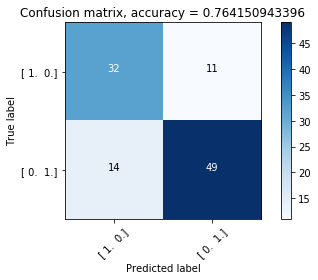

In [0]:
plt.figure()
plot_confusion_matrix(cnf_real, classes=label,title='Confusion matrix, accuracy = '+str(acc_real))
plt.savefig(os.path.join(folderName, 'cnfReal.png'), format='png', dpi=200)
plt.show()

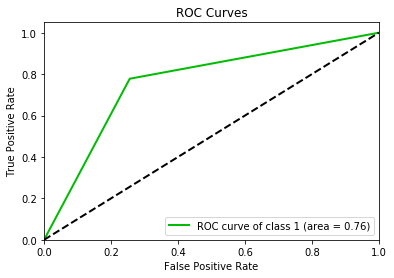

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_esn,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.savefig(os.path.join(folderName, 'notempoReal.png'), format='png', dpi=200)
plt.show() 

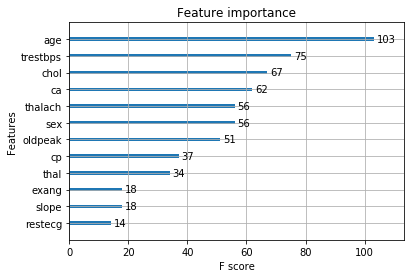

In [0]:
xgboost.plot_importance(model)

In [0]:
cls=opt_cls

<b> Меняем первые два признака по importance

In [0]:
changed1st2d=inputData.copy()
changed1st2d[:,featlist[-2]],changed1st2d[:,featlist[-1]]=changed1st2d[:,featlist[-1]],changed1st2d[:,featlist[-2]].copy()

In [0]:
cls.fit(changed1st2d[:n_train],outputData[:n_train])

0.69248683860038285

In [0]:
pred_1st2d=cls.predict(changed1st2d[n_train:])
cnf_1st2d=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
cnf_1st2d

array([[35,  8],
       [17, 46]], dtype=int64)

In [0]:
acc_1st2nd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(acc_1st2nd)

0.764150943396


Confusion matrix, without normalization  81


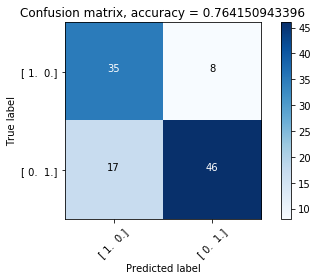

In [0]:
plt.figure()
plot_confusion_matrix(cnf_1st2d, classes=label,title='Confusion matrix, accuracy = '+str(acc_1st2nd))
plt.savefig(os.path.join(folderName, '1st2ndcnfReal.png'), format='png', dpi=200)
plt.show()

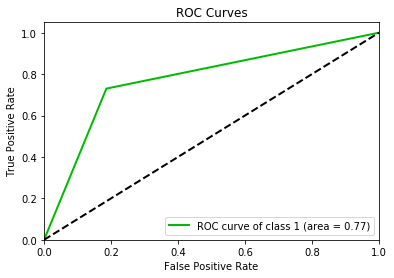

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1st2d,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.savefig(os.path.join(folderName, '1st2ndReal.png'), format='png', dpi=200)
plt.show() 

<b> Меняем первый признак с последним по importance

In [0]:
changed1stEnd=inputData.copy()
changed1stEnd[:,featlist[0]-1],changed1stEnd[:,featlist[-1]]=changed1stEnd[:,featlist[-1]],changed1stEnd[:,featlist[0]-1].copy()

In [0]:
cls.fit(changed1stEnd[:n_train],outputData[:n_train])

1.3988794211942328

In [0]:
pred_1stEnd=cls.predict(changed1stEnd[n_train:])
cnf_1stEnd=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
cnf_1stEnd

array([[33, 10],
       [11, 52]], dtype=int64)

In [0]:
acc_1stEnd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
print(acc_1stEnd)

0.801886792453


Confusion matrix, without normalization  85


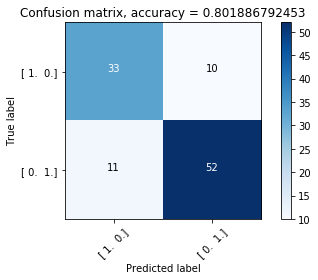

In [0]:
plt.figure()
plot_confusion_matrix(cnf_1stEnd, classes=label,title='Confusion matrix, accuracy = '+str(acc_1stEnd))
plt.savefig(os.path.join(folderName, '1stEndcnfReal.png'), format='png', dpi=200)
plt.show()

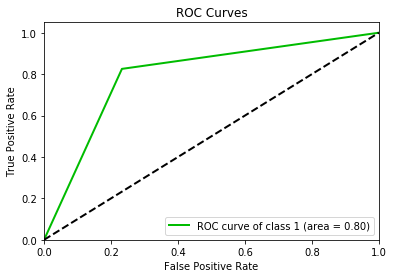

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1stEnd,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.savefig(os.path.join(folderName, '1stEndReal.png'), format='png', dpi=200)
plt.show() 

####  По порядку importance

In [0]:
copy=inputData.copy()
ordered=inputData.copy()
for i in range(inputData.shape[1]):
    ordered[:,i]=copy[:,featlist[i]-1]

In [0]:
cls.fit(ordered[:n_train],outputData[:n_train])

1.3949996625922048

In [0]:
pred_ord=cls.predict(ordered[n_train:])
cnf_ord=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
cnf_ord

array([[32, 11],
       [13, 50]], dtype=int64)

In [0]:
acc_ord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(acc_ord)

0.77358490566


Confusion matrix, without normalization  82


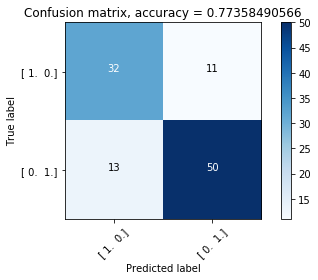

In [0]:
plt.figure()
plot_confusion_matrix(cnf_ord, classes=label,title='Confusion matrix, accuracy = '+str(acc_ord))
plt.savefig(os.path.join(folderName, 'ordcnfReal.png'), format='png', dpi=200)
plt.show()

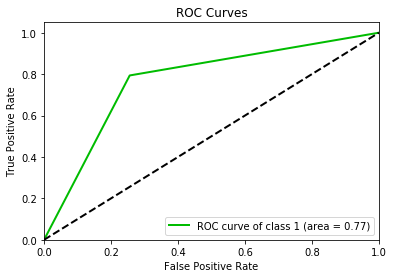

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_ord,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.savefig(os.path.join(folderName, 'ordReal.png'), format='png', dpi=200)
plt.show() 

#### В обратном порядке importance

In [0]:
copy=inputData.copy()
reverse=inputData.copy()
for i in range(inputData.shape[1]):
    reverse[:,i]=copy[:,featlist[inputData.shape[1]-i-1]-1]

In [0]:
cls.fit(reverse[:n_train],outputData[:n_train])

1.3905342993089334

In [0]:
pred_rev=cls.predict(reverse[n_train:])
cnf_rev=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
cnf_rev

array([[33, 10],
       [11, 52]], dtype=int64)

In [0]:
acc_nonord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(acc_nonord)

0.801886792453


Confusion matrix, without normalization  85


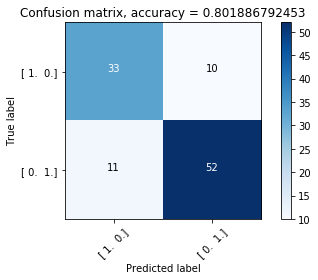

In [0]:
plt.figure()
plot_confusion_matrix(cnf_rev, classes=label,title='Confusion matrix, accuracy = ' +str(acc_nonord))
plt.savefig(os.path.join(folderName, 'nonordcnfReal.png'), format='png', dpi=200)
plt.show()

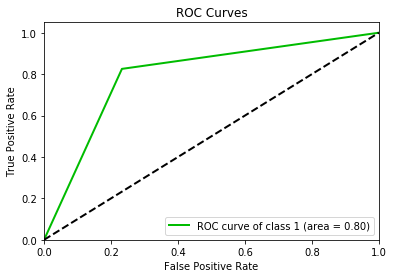

In [0]:
fpr, tpr, thresholds =roc_curve(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_rev,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'nonordReal.png'), format='png', dpi=200)
plt.show() 

#### Перемешиваем все столбцы 

In [0]:
shuffled=inputData.copy()
shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]

In [0]:
optCls.fit(shuffled[:n_train],outputData[:n_train])

0.85662682507877908

In [0]:
pred_shuffl=optCls.predict(shuffled[n_train:])
cnf_shuffl=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
cnf_shuffl

array([[30, 13],
       [12, 51]], dtype=int64)

In [0]:
acc_shuff=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))

Confusion matrix, without normalization  81


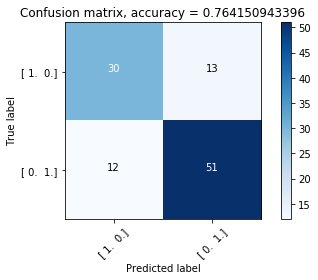

In [0]:
plt.figure()
plot_confusion_matrix(cnf_shuffl, classes=label,title='Confusion matrix, accuracy = '+str(acc_shuff))
plt.savefig(os.path.join(folderName, 'shuffcnfReal.png'), format='png', dpi=200)
plt.show()

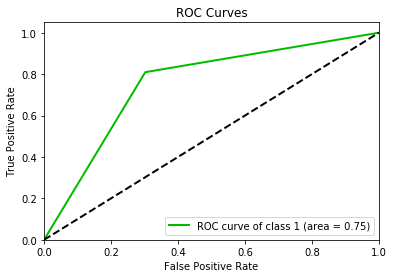

In [0]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_shuffl,classes_to_plot=[1],plot_micro=False,plot_macro =False)
plt.savefig(os.path.join(folderName, 'shuffReal.png'), format='png', dpi=200)
plt.show() 

## проверка гипотез о независимости результатов бинарного классификатора ClassificationESN от темпорализации набора данных

In [0]:
data=data.sample(frac=1)

In [0]:
DataFrame(data).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0


<b> генерирование выборок для проверки равенства средних accuracy и F1 score для набора данных с признаками , отсортированными по imoprtance и расставленными в случайном порядке

In [0]:
def test(_data,n_iter):
    accuracy_imp_ord=[]
    f1_imp_ord=[]
    accuracy_shuff=[]
    f1_shuff=[]
    bar = progressbar.ProgressBar().start()
    for i in range(n_iter):
        bar.update(i)
        #print("iter = ",i+1 )
        data=_data
        data=data.sample(frac=1)

        _input=DataFrame(data.loc[:,data.columns[:-1]],columns=data.columns)
        _output=data.loc[:,data.columns[-1]]


        ohe=OneHotEncoder()
        inputData=np.array(data.loc[:,data.columns[:-1]])
        outputData=ohe.fit_transform(np.array(_output))
        n_train=round(0.65*inputData.shape[0])
        
        #узнаем feature_importance
        model = xgboost.XGBClassifier()
        model.fit(_input[:n_train],_output[:n_train])
        model.importance_type="weight"
        featlist=model.feature_importances_.argsort()
        featlist=featlist[1:]

        cls=ClassificationESN(1,300, 2, leakingRate=  0.6958333333333333)

        # в порядке importance
        copy=inputData.copy()
        ordered=inputData.copy()
        for j in range(inputData.shape[1]):
            ordered[:,j]=copy[:,featlist[j]-1]
        cls.fit(ordered[:n_train],outputData[:n_train])
        y_predOrd=cls.predict(ordered[n_train:])
        #accuracy
        accuracy_imp_ord.append(accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predOrd,axis=1)))
        #f1_score
        f1_imp_ord.append(f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predOrd,axis=1)))
        
        # в случайном поярдке
        shuffled=inputData.copy()
        shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]
        cls.fit(shuffled[:n_train],outputData[:n_train])
        y_predShuff=cls.predict(shuffled[n_train:])
        #accuracy
        accuracy_shuff.append(accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predShuff,axis=1)))
        #f1_score
        f1_shuff.append(f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predShuff,axis=1)))
    bar.finish()    
    return accuracy_imp_ord,f1_imp_ord, accuracy_shuff, f1_shuff

In [1]:
def plt_distrub(test_sample,i,color):
    n=20#len(test_sample[i])
    s = pd.Series(test_sample[i])
    s.plot.kde()
    plt.plot([np.mean(test_sample[i]),np.mean(test_sample[i])],[0,n],color)
    plt.plot([np.mean(test_sample[i])+np.std(test_sample[i]),np.mean(test_sample[i])+np.std(test_sample[i])],
               [0,n],'--'+color)
    plt.plot([np.mean(test_sample[i])-np.std(test_sample[i]),np.mean(test_sample[i])-np.std(test_sample[i])],
               [0,n],'--'+color)
    plt.grid()
    return s

In [0]:
test_sample21=test(data,21)

/ |                 #                                | 20 Elapsed Time: 0:00:28

In [0]:
test_sample41=test(data,41)

| |            #                                     | 40 Elapsed Time: 0:00:58


In [0]:
test_sample81=test(data,81)

| |                                             #    | 80 Elapsed Time: 0:01:55


In [0]:
test_sample101=test(data,101)


| |                                     #           | 100 Elapsed Time: 0:02:23


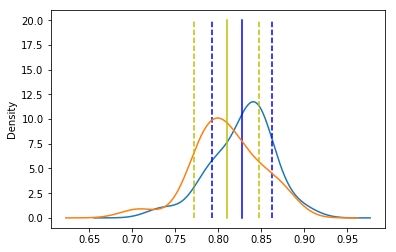

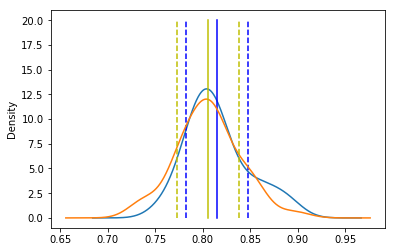

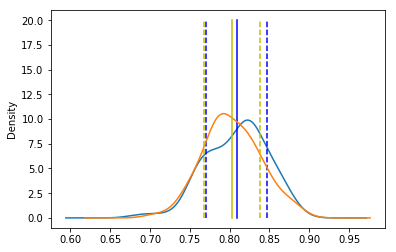

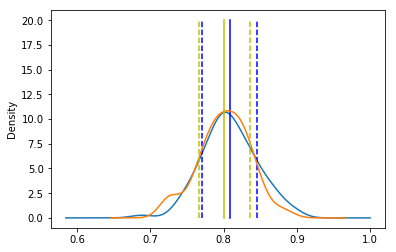

In [0]:
l=plt_distrub(test_sample21,0,'b')
plt_distrub(test_sample21,2,'y')
plt.show()
plt_distrub(test_sample41,0,'b')
plt_distrub(test_sample41,2,'y')
plt.show()
plt_distrub(test_sample81,0,'b')
plt_distrub(test_sample81,2,'y')
plt.show()
plt_distrub(test_sample101,0,'b')
plt_distrub(test_sample101,2,'y')
plt.show()



In [0]:
import scipy.stats as stats
from scipy.stats import norm,pearsonr

 Проверка критерия согласия с нормальным распределением

In [0]:
norm_sample=norm.pdf(test_sample101[0], np.mean(test_sample101[0]), np.std(test_sample101[0]))

In [276]:
pearsonr(norm_sample,test_sample101[0])

(0.005987613957463325, 0.952612575552177)

# Проверим гипотезу о равенстве средних у accuracy в порядке importance и случайно перемешанных features,  используя t-критерий Стьюдента

<b> объем выборки =101
  

In [0]:
stats.ttest_ind(test_sample101[0], test_sample101[2])

Ttest_indResult(statistic=0.6895018143976791, pvalue=0.491306733145336)

*freedom degrees = 101+101-2=200*  $ T_{alpha=0.01,f.d.=200} =2,601>0.689 $ cледовательно <b>  различия сравниваемых величин статистически не значимы